# Audio

## Task 1

Для начала познакомимся с этими записями. \
Установи библиотеку [librosa](https://librosa.org/). Это популярная библиотека для работы с аудио.
Визуализируй аудио сигнал файла `0_1_0_1_1_1_0_0.wav` с помощью функции [librosa.display.waveshow](https://librosa.org/doc/main/generated/librosa.display.waveshow.html)
График должен быть такой же, как показано ниже (по значениям):

![waveform](../misc/images/waveform.png)
>Для того, чтобы прослушать это аудио файл, можешь воспользоваться [IPython.display.Audio](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio)

In [3]:
!pip install librosa

     -------------------------------------- 253.0/253.0 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 184.0/184.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.0/1.0 MB 12.8 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23736 sha256=ca06d9e9a692bf1e19f72b8e63be6f3fb99b381c9bda7cce91917087ffb997e0
  Stored in directory: c:\users\nick1\appdata\local\pip\cache\wheels\3d\e0\4b\51b8aa4a0e2b6361c14943f7a7c2c7adb7b9cd419e0a1b720d
Successfully built audioread


In [4]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [5]:
audio = '../datasets/waves_yesno 2/0_1_0_1_1_1_0_0.wav' #воспроизводим аудио сигнал файла
ipd.Audio(audio) #создается интеракт-я кнопка для воспроиз-я аудио файла

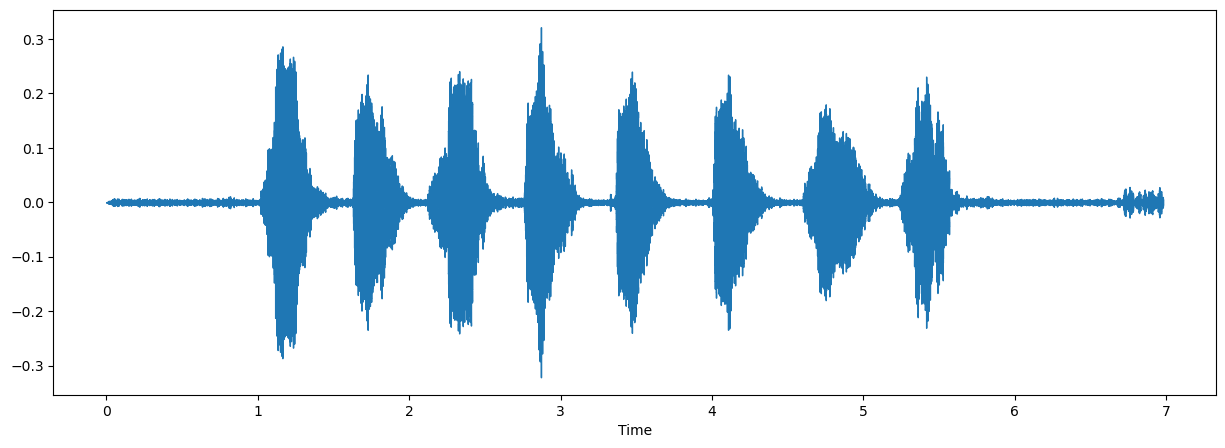

In [6]:
y, sr = librosa.load(audio) #y-звуковой временной ряд (моно или стерео), sr-частота дискретизации y(выборки в секунду)
fig, ax = plt.subplots(nrows=1, sharex=True,sharey=True,figsize=(15,5)) #nrows-Количество строк сетки подграфика.sharex,sharey -Средства управления, совместно использующие свойств среди x (sharex) или y (sharey) оси:x-или ось y будут общими для все подграфики.
librosa.display.waveshow(y, sr=sr) #Визуализируем форму волны во временной области
plt.show()

## Task 2

Для классификации обычно использует не просто аудио сигнал, а его частотно-временное представление. Для этого сигнал требуется
преобразовать с помощью [оконного преобразования Фурье](https://clck.ru/34JnZD).
С помощью функции [librosa.display.specshow](https://librosa.org/doc/main/generated/librosa.display.specshow.html) 
выведи спектрограмму сигнала. \
График должен быть такой же, как показано ниже (по значениям):
![sftp](../misc/images/sftp.png)

In [4]:
#Оконное преобразование Фурье-Преобразование Фурье – это инструмент, который позволяет в исследуемом сигнале увидеть вклад каждой 
#                                        из этих гармонических составляющих, характеризуемых определенной частотой. 
#                                       В этом смысле говорят, что преобразование Фурье позволяет разложить функцию по частотам.

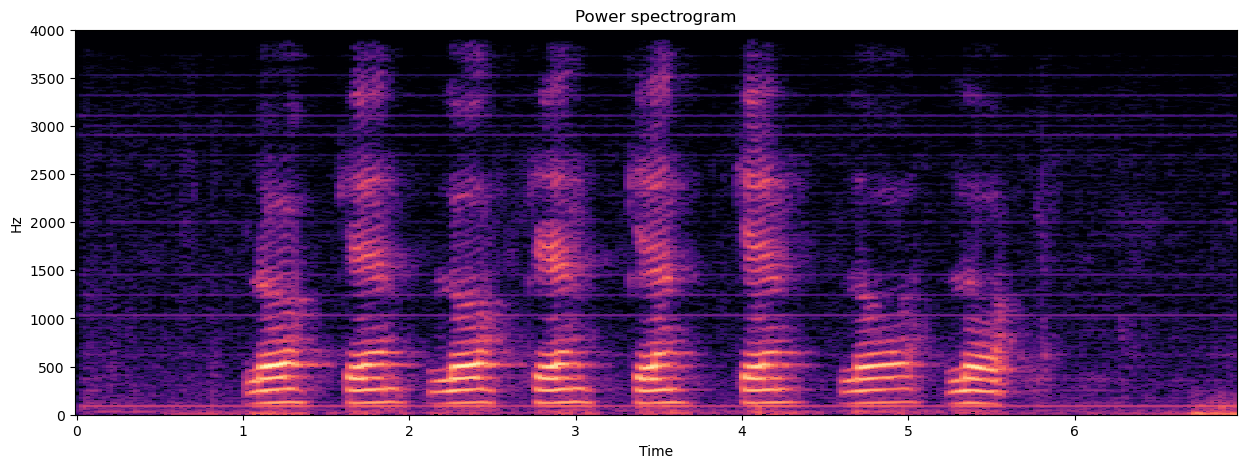

In [7]:
X= librosa.stft(y) #Оконное преобразование Фурье для спектограммы Х
fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(X)), #librosa.amplitude_to_db(np.abs(X)-Преобразуйте спектрограмму амплитуды в спектрограмму в масштабе децибел
                               y_axis='fft', x_axis='time', sr=sr) # Диапазон для осей x и y-частотный диапазон определяется окном FFT и частотой дискретизаци.Отображаются в единицах Гц
ax.set_ylim([0,4000])
ax.set_title('Power spectrogram')
#fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

## Task 3

C помощью функции [load_dataset](code-samples/audio_utils.py) загрузи датасет. \
Раздели его на train и test c параметрами `test_size=0.2`, `random_state=42`. \
Выведи количество файлов в train и test частях.

In [8]:
import os
from glob import glob
from sklearn.model_selection import train_test_split

def load_dataset(directory: str):
    sr = None
    X, labels, files = [], [], []
    for f in glob(directory + "/*.wav"):
        filename = os.path.basename(f)
        name = filename[:-4]
        y = [int(label) for label in name.split("_")]
        x, sr = librosa.load(f)
        X.append(x)
        labels.append(y)
        files.append(filename)

    return X, labels, sr, files
# :param directory: Путь к директории с аудио
# :return:
#  X - Список аудио сигналов
#  labels - Список меток (Например для файла '0_0_0_1_0_1_1_0.wav': [0, 0, 0, 1, 0, 1, 1, 0])
#  sr - частоты дискретизаций аудио файлов
#  files - Названия файлов


In [9]:
directory= '../datasets/waves_yesno 2/'
X, labels, sr, files = load_dataset(directory)
print ('количество файлов:', len (files))

X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state = 42, test_size = 0.2)
#X_train, X_test,labels_train,labels_test,files_train,files_test = train_test_split(X, labels, files,test_size=0.2, random_state=42)

print ('количество файлов в train(обучающей) выборке:', len(X_train))
print ('количество файлов в test(тестовой) выборке:', len(X_test))

количество файлов: 59
количество файлов в train(обучающей) выборке: 47
количество файлов в test(тестовой) выборке: 12


## Task 4

Наши аудио записи содержат как речь человека, так и молчание. Для каждой записи нам нужно определить сегменты записи, 
где человек молчит, а где произносит слова. \
Эта задача называется [Voice Activity Detection (VAD)](https://ru.wikipedia.org/wiki/Voice_Activity_Detection).
Придумайте или найдите метод, по которому можно распознавать участки с речью на аудио записи.

Например:
Запись '0_0_0_1_0_1_1_0.wav' содержит 137592 отсчетов. Сегменты с речью для этой записи (Отмечены красным):
[[23996, 32539],
 [35410, 44925],
 [49493, 57410],
 [60458, 68635],
 [73308, 81278],
 [84001, 91942],
 [97381, 104166],
 [109018, 115573]] 
![sftp](../misc/images/vad.png)

Выведи несколько примеров работы твоего VAD-алгоритма, по аналогии с примером, для других аудио записей. Попробуй добиться
наилучшего качества нахождения речи.

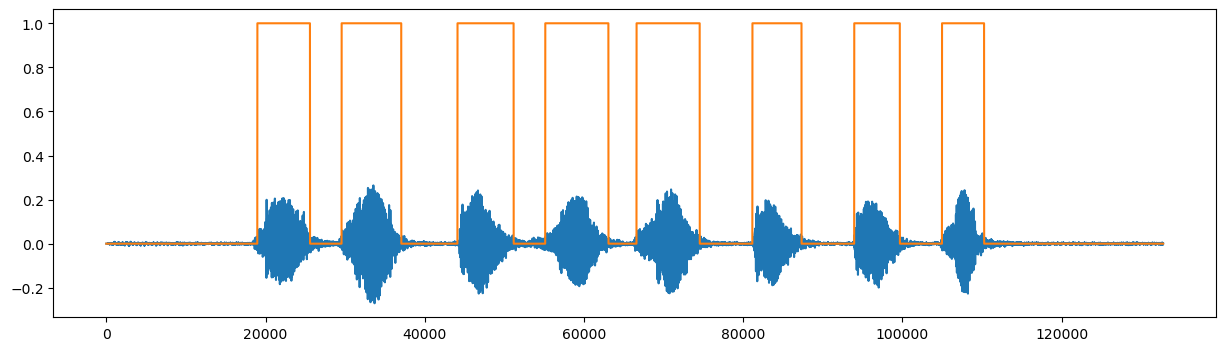

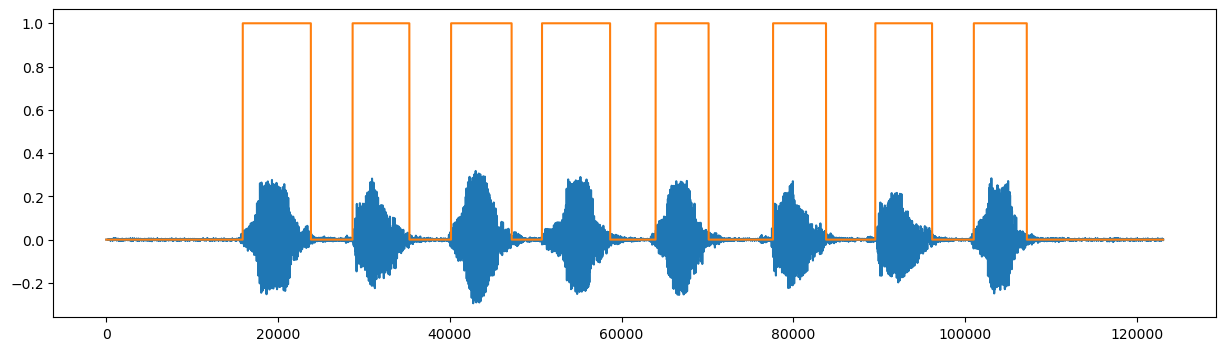

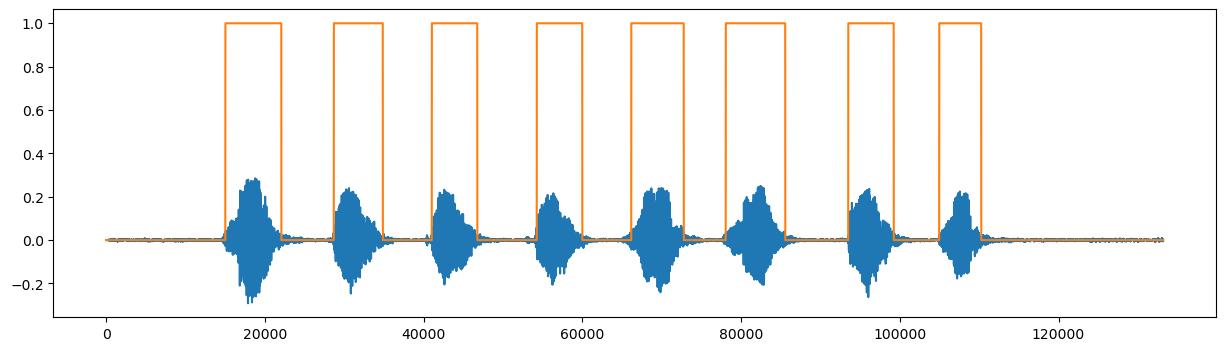

In [10]:
#VAD — обнаружение голосовой активности во входном акустическом сигнале для отделения активной речи от фонового шума или тишины.
def vad(audio, frame_size=0.02, energy_threshold=0.1):  #   frame_size и energy_threshold - это параметры функции vad, которые 
                                                        #   определяют размер фрейма в секундах и пороговое значение энергии 
                                                        #   для определения речи. По умолчанию frame_size равен 0.02 секунды 
                                                        #   и energy_threshold равен 0.1.
    sample_rate = sr  
    frame_length = int(frame_size * sample_rate)        #   frame_length вычисляется путем умножения frame_size на sample_rate и
                                                        #   приведения к целочисленному значению. 
                                                        #   Это определяет количество отсчетов в каждом фрейме.
    
   
    frames = np.array_split(audio, len(audio) // frame_length) # разделяет аудио сигнал на фреймы заданного размера. Функция np.array_split разбивает 
                                                               # массив audio на части равной длины, используя len(audio) // frame_length в качестве количества фреймов.
    
    segments = []                          # инициализируется пустым списком, который будет содержать сегменты с речью

    for i, frame in enumerate(frames):     # перебирает все фреймы и выполняет следующие шаги для каждого фрейма:

        energy = np.sum(frame ** 2)  #вычисляет энергию фрейма путем возведения в квадрат и суммирования амплитуд отсчетов внутри фрейма       
        
        if energy > energy_threshold:      
            if not segments or i - segments[-1][1] > 1:
                segments.append([i, i])
            else:
                segments[-1][1] = i
# Если энергия фрейма превышает пороговое значение energy_threshold, то проверяется условие if not segments or i - segments[-1][1] > 1:
# Если это первый фрейм или между предыдущим сегментом и текущим фреймом есть пропуск больше чем 1 фрейм, 
# то создается новый сегмент [i, i] и добавляется в список segments.
# Иначе, обновляется конечный индекс последнего сегмента segments[-1][1] = i.
                

    segments = [[start * frame_length, (end + 1) * frame_length] for start, end in segments] # segments преобразуется, чтобы отображать отсчеты вместо индексов фреймов   
 
    return segments   #Функция возвращает список segments, содержащий начальные и конечные отсчеты сегментов с речью

samples, labels, sr, files = load_dataset('../datasets/waves_yesno 2')

def make_graphic(segments,audio):   #функция построения графиков
    segm = []
    start = 0
    for i in segments:
        segm += [0 for i in range(start,i[0])]
        segm += [1 for i in range(i[0],i[1])]
        start = i[1]
    segm += [0 for i in range(segments[-1][1],len(audio))]

    plt.figure(figsize = (15,4))
    plt.plot(audio)
    plt.plot(segm)

audio = samples[4] # Выбераем запись из датасета
segments = vad(audio)# Применение VAD-алгоритма
make_graphic(segments,audio)# Вывод результатов 

audio = samples[18] 
segments = vad(audio)
make_graphic(segments,audio)

audio = samples[27] 
segments = vad(audio)
make_graphic(segments,audio)
 

In [11]:
vad_segments=[]    # Сегменты с речью для всех записей
for i in range (0,len(samples)):
    segments=vad(audio)
    vad_segments.append(segments)


## Task 5

После того как мы узнали сегменты аудио с речью, то можно перейти к самой задаче классификации. \
Внимательно изучи функцию [make_dataset](code-samples/audio_utils.py). С помощью этой функции cгенерируй X, Y для train и test выборок.
Затем попробуй обучить различные классификаторы. Например, SVM или LogisticRegression.
Измерь точность (accuracy) классификации на тестовой выборке.

In [10]:
def make_dataset(samples, labels, vad_segments):
    """

    :param samples: Список аудио сигналов
    :param labels: Список меток (Например для файла '0_0_0_1_0_1_1_0.wav': [0, 0, 0, 1, 0, 1, 1, 0])
    :param vad_segments: Список сегментов для каждого аудио сигнала вида:
        [
            [[23996, 32539], [35410, 44925], ...,],
            [[22141, 30259], [34917, 42695], ...,],
            ...
        ]
    :return:
    """
    X, y = [], []
    # Проходим по каждому аудио сигналу
    for sample in range(len(samples)):
        # В аудио сигнале проходим по каждому сегменту с речью
        for segment in range(len(vad_segments[sample]) - 1):
            start = vad_segments[sample][segment][0]  # Начало сегмента
            stop = vad_segments[sample][segment][1]  # Конец сегмента
            voice = samples[sample][start:stop]  # Отрезаем сегмент с речью из аудио сигнала и применяем stft
            stft = librosa.stft(voice).mean(axis=1)
            stft_db = librosa.amplitude_to_db(abs(stft))

            X.append(stft_db)  # Добавляем спектрограмму с речью
            y.append(labels[sample][segment])  # Добавляем метку для этой спектрограммы

    return np.array(X), np.array(y)

In [11]:
X,y = make_dataset(X,labels, vad_segments)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [12]:
from sklearn.linear_model import LogisticRegression #Классификатор логистической регрессии
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore')


model = LogisticRegression()                 
model.fit(X_train, y_train)                                  # Обучим классификатор
y_pred =  model.predict(X_test) 

accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Точность классификации: ',round (accuracy,5))


Точность классификации:  0.86747


In [13]:
from sklearn import svm #Машины опорных векторов (SVM) — это набор контролируемых методов обучения, используемых для классификации , регрессии и обнаружения выбросов

clf = svm.SVC(kernel='linear') #Функция ядра может быть любой(linear,polynomial,rbf,sigmoid)
clf.fit(X_train, y_train) #Обучаем модель на тренировочном ноборе
y_pred = clf.predict(X_test) 
accuracy = accuracy_score(y_test,y_pred)
print('Точность классификации: ', round (accuracy,5))

Точность классификации:  0.87952
